In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns',200)
pd.set_option('display.width',400)

In [2]:
df0 = pd.read_csv('Clean Data1.csv')

In [4]:
df0.head(2)

,Unnamed: 0,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,month,year,loan_amt_range,int_rate_range,annual_inc_range
0,0,5000,4975.00,36 months,10.65,low,B,B2,10,RENT,24000.00,Verified,12-2011,0,credit_card,AZ,27.65,85,1,3,0,83.70,9,12,2011,0-5000,10-12.5,0-25000
1,1,2500,2500.00,60 months,15.27,low,C,C4,0,RENT,30000.00,Source Verified,12-2011,1,car,GA,1.00,99,5,3,0,9.40,4,12,2011,0-5000,15+,25000-50000


In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33732 entries, 0 to 33731
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           33732 non-null  int64  
 1   loan_amnt            33732 non-null  int64  
 2   funded_amnt_inv      33732 non-null  float64
 3   term                 33732 non-null  object 
 4   int_rate             33732 non-null  float64
 5   installment          33732 non-null  object 
 6   grade                33732 non-null  object 
 7   sub_grade            33732 non-null  object 
 8   emp_length           33732 non-null  int64  
 9   home_ownership       33732 non-null  object 
 10  annual_inc           33732 non-null  float64
 11  verification_status  33732 non-null  object 
 12  issue_d              33732 non-null  object 
 13  loan_status          33732 non-null  int64  
 14  purpose              33732 non-null  object 
 15  addr_state           33732 non-null 

## Categorical Features:

* Term
* Installment
* Grade
* Sub-grade
* Employemeent length (emp_length)
* Home ownership
* Verification status
* Purpose
* Address state
* inq_last_6_months - Categorical+continuous
* month
* Year
* Loan Amount range
* Interest rate range
* Annual income range


## Continuous Features

* Loan Amount
* Funded amount
* Interest rate
* Emp length
* Annual Income
* Issue Date
* Address state
* dti
* earliest credit line
* open_acc
* pub_rec
* inq_last_6_months
* revol_util
* total_acc

In [27]:
def plotUnivariateCount(feature,data=df0,figsize=(10,7),rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature] == fd]
        feature_count = len(feature_filter[feature_filter['loan_status'] == 1])
        feature_values.append(feature_count*100/feature_filter['loan_status'].count())
        
    plt.bar(feature_dimension,feature_values,color='blue',edgecolor='white')
    plt.title('Loan Defaults wrt '+str(feature)+' feature- CountPlot \n',fontdict={'fontsize':18,'color':'red'})
    plt.xlabel(feature,fontdict={'fontsize':14,'color':'brown'})
    plt.ylabel('defaulter %',fontdict={'fontsize':14,'color':'brown'})
    plt.show()

In [28]:
def plotUnivariateBar(x,figsize=(10,7)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', data=df0)
    plt.title('Loan defaults wrt '+str(x)+' feature- CountPlot \n', fontdict={'fontsize':18,'color':'red'})
    plt.xlabel(x,fontdict={'fontsize':14,'color':'brown'})
    plt.ylabel('defaulter ratio',fontdict={'fontsize':14,'color':'brown'})
    plt.show()

# 1. Univariate Analysis

## a. Categorical Variables

### Term

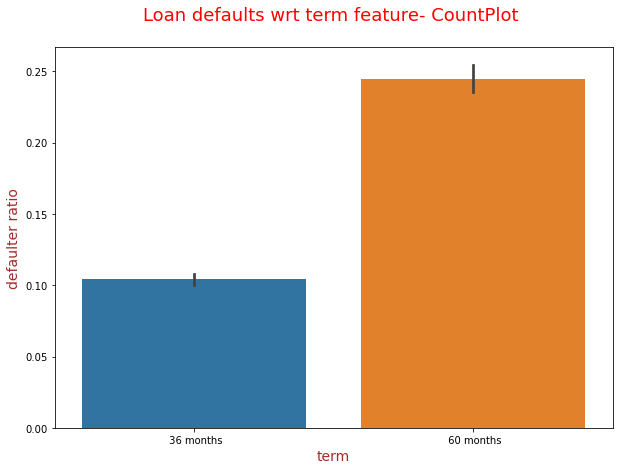

In [32]:
## check for defaulters wrt term of loan:
plotUnivariateBar('term')

From the above graph we can see that defaulters rate is increasing with increase in loan term, hence chances of loan getting defaulted for 36m is less than 60m.

* term -> YES

### Installment

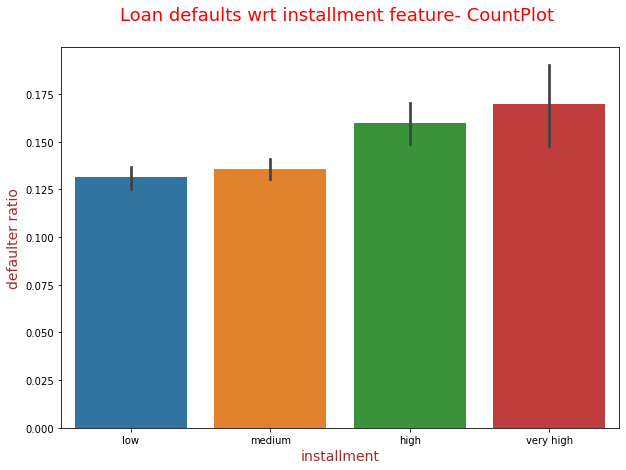

In [34]:
## check for defaulters wrt installment amount:
plotUnivariateBar('installment')

From the above graph we can see that defaulter ratio increases with the increase in the installment amounts. So there are higher chances of loan getting default when installment amount is high.

* Installment -> YES

### Grade

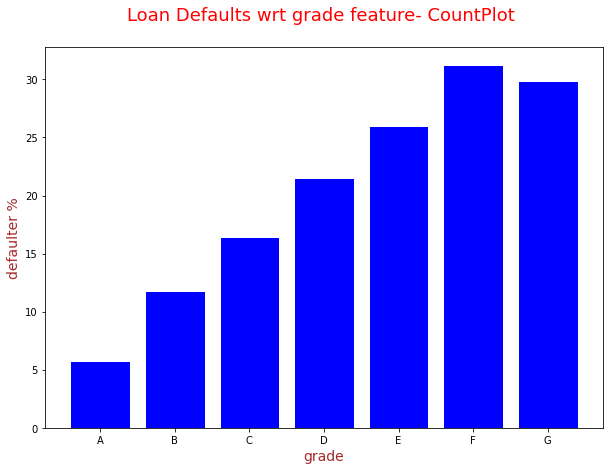

In [36]:
## check for defaulters wrt grade
plotUnivariateCount('grade')

From the above graph for grade we can infer that the defaulters % is increasing wrt grade. Hence chance of loan getting defaulted increases as we go from A to G.

* grade -> YES

### Sub-grade

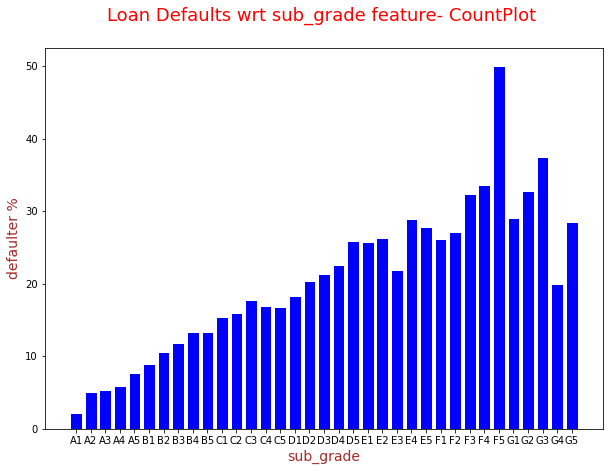

In [38]:
## check for defaulters wrt sub-grade of the loan:
plotUnivariateCount('sub_grade')

From the above plot we can see that the chances of loan getting defaulted increases as we move from A1 to G5.

* Sub-grade -> YES

### Employement Length

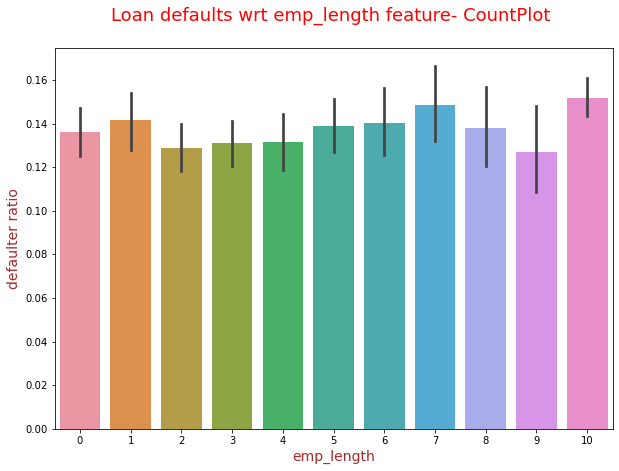

In [40]:
## check for defaulters wrt employement length
plotUnivariateBar('emp_length')

Here as we can see from the plot that there is no specific relation between defaulters and employement length.

* emp_length -> NO

### Home Ownership

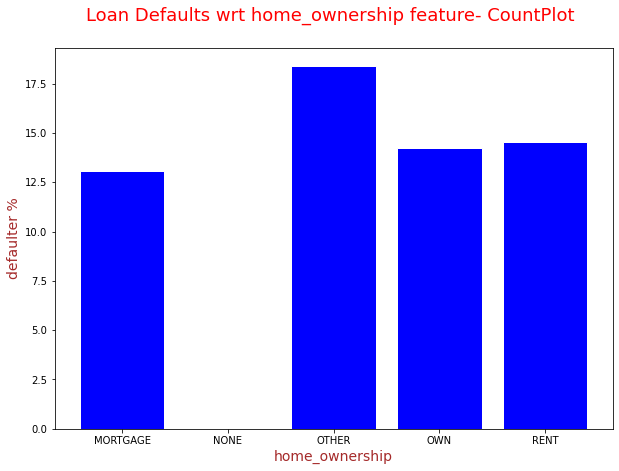

In [42]:
## check for defaulters wrt home_ownership
plotUnivariateCount('home_ownership')

From the plot we can infer that defaulter rate is pretty much constant wrt home ownership. It is quite high for OTHERS, but it is too vague to decide. So we will not take it for our analysis.

* home_ownership -> NO

### Verification status

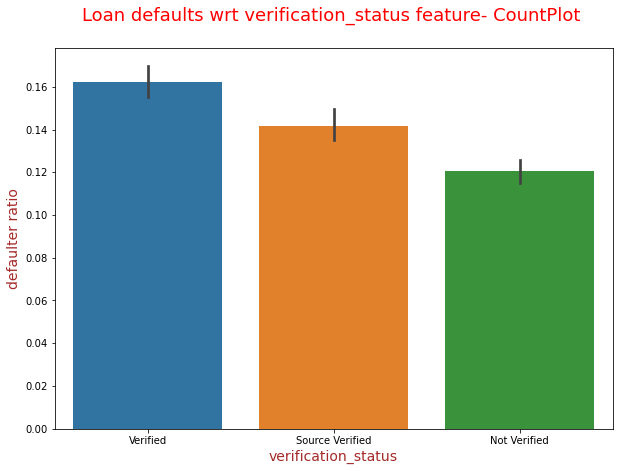

In [43]:
## check for defaulters wrt verification status
plotUnivariateBar('verification_status')

From the plot we can see that defaulter rate is high for Verified customers and low for Not verified one's.

* verification_status -> YES

### Purpose

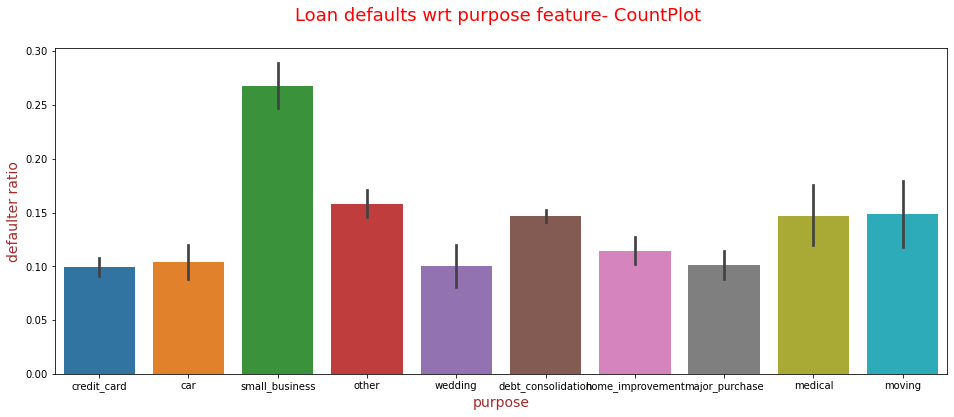

In [45]:
## check for defaulters wrt purpose of loan
plotUnivariateBar('purpose', figsize=(16,6))

Here we can see that defaulters ratio is nearly same for each purpose but it is very high for type 'small_business'. Hence default rate will depend on the purpose of loan.

* purpose -> YES

### Address State

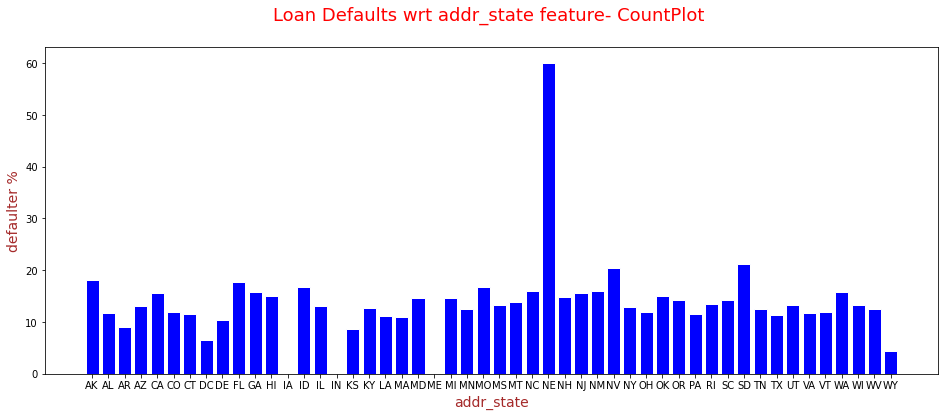

In [47]:
## check for defaulters wrt address state
plotUnivariateCount('addr_state',figsize=(16,6))

From the plot we can see that defaulter % is nearly constant for every state except for 'NE', but we cannot use it in our analysis. Hence defaulter rate will not depend on Address state.

* addr_state -> NO

### Number of inquiries in past 6 months

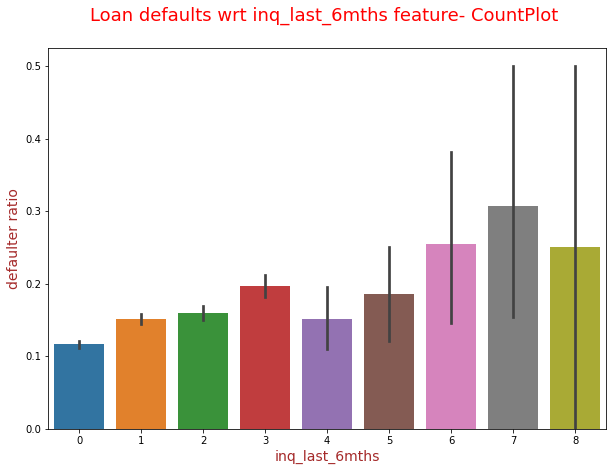

In [48]:
## check for defaulter ratio wrt inq_past_6_months
plotUnivariateBar('inq_last_6mths')

Here from the plot we can infer that defaulter rate is not consistently increasing wrt inq_last_6mths , Hence we cannot use it in our analysis.

* inq_last_6mths -> NO

### Month

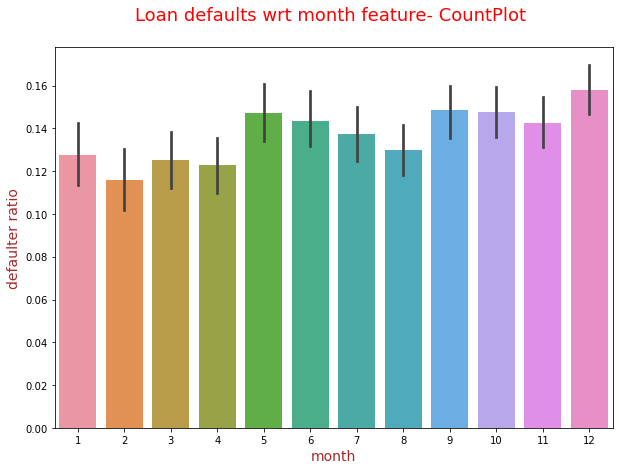

In [49]:
## check for defaulter rate wrt month in which loan was funded
plotUnivariateBar('month')

Here From the above plot we can see that defaulter rate is nearly same wrt the month in which loan was funded. Hence not so usefull parameter.

* month -> NO

### Year

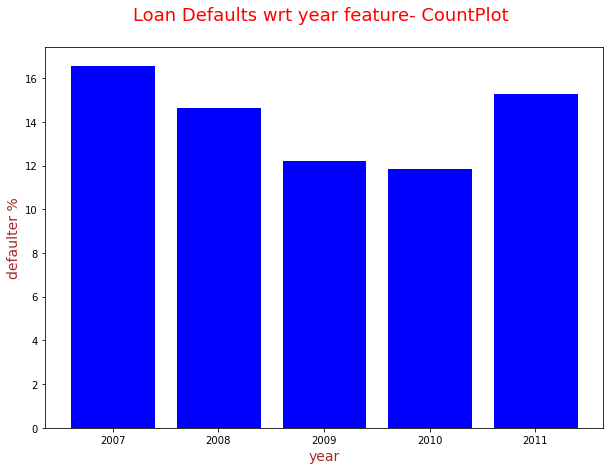

In [51]:
## check for loan defaulters wrt year in which loan was funded
plotUnivariateCount('year')

From the above plot we can see that defaulter % is nearly constant wrt Year, it is just in range of 12-16%. Hence we cannot use it in our analysis.

* Year -> NO

### Loan Amount range

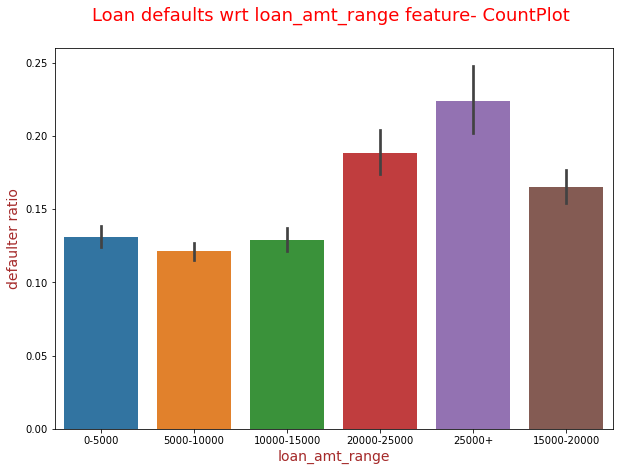

In [54]:
## check for defaulters wrt loan amount range 
plotUnivariateBar('loan_amt_range')

Here we can see that defaulters rate increases with the increase in the loan amount range, hence it will depend on this feature.

* loan_amt_range -> YES

### Interest rate range

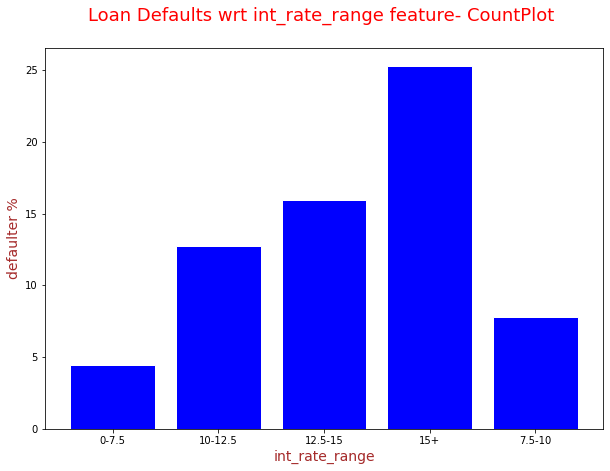

In [58]:
## check for defaulters wrt int_rate_range
plotUnivariateCount('int_rate_range')

From the plot we can see that defaulter % is increasing with the increase in interest rate range consistently. Hence, it will depend on this feature.

* int_rate_range -> YES

### Annual Income range

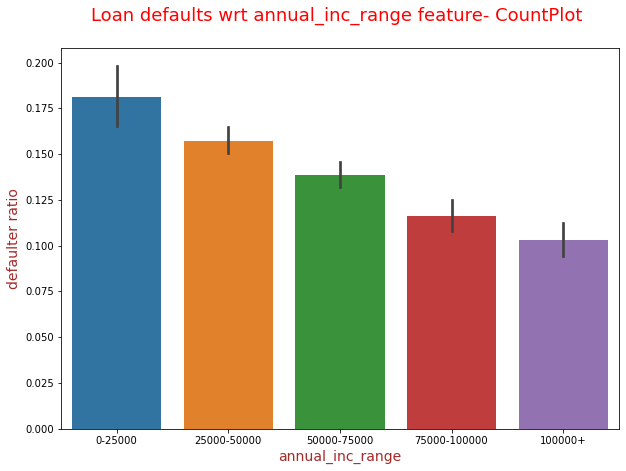

In [59]:
## check for defaulters wrt annual income ranges
plotUnivariateBar('annual_inc_range')

Here we can see that defaulters rate decreases with increase in the annual income range. Hence it will depend on this feature.

* annual_inc_range -> YES